<a href="https://colab.research.google.com/github/khs960616/Algorithm/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
```

#KNN 방식 (중간 보고서)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os,sys
import matplotlib.pyplot as plt
import pandas as pd
from numpy import genfromtxt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
# X_train = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/X_train.csv')
# y_train = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/y_train.csv')

# X_test = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/X_test.csv')
# y_test = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/y_test.csv')


# X_train = genfromtxt('/content/drive/MyDrive/인공지능프로젝트/data/X_train.csv', delimiter=',')[1:,1:]
# y_train = genfromtxt('/content/drive/MyDrive/인공지능프로젝트/data/y_train.csv', delimiter=',')[1:,1:]

df = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/creditcard.csv')

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


# y_train = y_train.reshape(len(y_train))
# y_train = y_train.astype('uint8')
# print(y_train)

# X_test = genfromtxt('/content/drive/MyDrive/인공지능프로젝트/data/X_test.csv', delimiter=',')[1:,1:]
# y_test = genfromtxt('/content/drive/MyDrive/인공지능프로젝트/data/y_test.csv', delimiter=',')[1:,1:]

# y_test = y_test.reshape(len(y_test))
# y_test = y_test.astype('uint8')


# test_counts = 20000 # train 갯수
# test_idxs = np.random.randint(0, X_test.shape[0], test_counts)

# X_train = X_train[test_idxs]
# y_train = y_train[test_idxs]


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5,weights='distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classifier.score(X_train, y_train)) #X_train train set의 입력 , y_train 은 train set 의 정답

print("y_test.ndim :",y_test.ndim)
print("y_test.shape  :",y_test.shape)


print("y_pred.ndim :",y_pred.ndim)
print("y_pred.shape  :",y_pred.shape)



# https://m.blog.naver.com/kiddwannabe/221369816719
# 오차 행렬을 구하는 함수 confusion_matrix 사용함
# https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html

# for x,y in zip(y_test ,
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))



1.0
y_test.ndim : 1
y_test.shape  : (85443,)
y_pred.ndim : 1
y_pred.shape  : (85443,)
[[85292     4]
 [  139     8]]
0.9983263696265346
0.6666666666666666
0.05442176870748299
0.10062893081761005
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.67      0.05      0.10       147

    accuracy                           1.00     85443
   macro avg       0.83      0.53      0.55     85443
weighted avg       1.00      1.00      1.00     85443



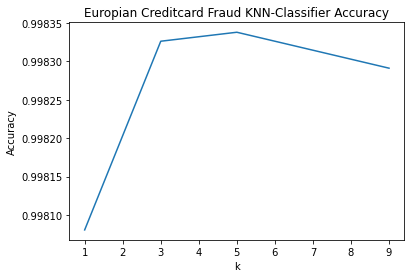

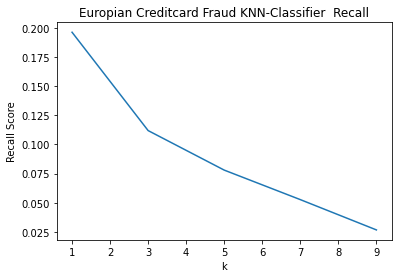

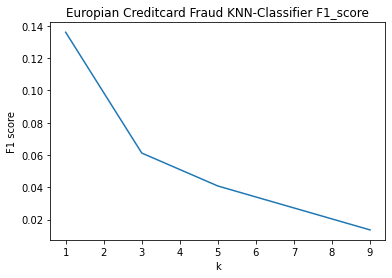

In [ ]:
# k_list = range(1,101)
k_list = list(filter(lambda x:x%2 == 1 ,[ i for i in range(10)] ))
accuracies = []
recall_list = []
f1_score_list =[]
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)


  accuracies.append(accuracy_score(y_test,y_pred))
  recall_list.append(f1_score(y_test,y_pred))
  f1_score_list.append(recall_score(y_test,y_pred))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Europian Creditcard Fraud KNN-Classifier Accuracy")
plt.show()

plt.plot(k_list, recall_list)
plt.xlabel("k")
plt.ylabel("Recall Score")
plt.title("Europian Creditcard Fraud KNN-Classifier  Recall")
plt.show()

plt.plot(k_list, f1_score_list)
plt.xlabel("k")
plt.ylabel("F1 score")
plt.title("Europian Creditcard Fraud KNN-Classifier F1_score")
plt.show()

# KNN 알고리즘 , data 전처리 버전 (보고서)
---




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import itertools
import seaborn as sns 

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm

# from pyod.models.knn import KNN 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
data = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/creditcard.csv')

data.Class.value_counts(normalize=True)
data.head()


corr = data.corr() 

fig = plt.figure(figsize=(30,20)) 

sns.heatmap(corr,cmap= "YlGnBu", vmax=.8, square=True,annot=True)
#컬럼마다 상관관계를 알기위하여 seaborn 라이브러리의 heapmap 함수를 이용

FileNotFoundError: ignored

In [ ]:
train_sizes = [1000,2000,5000,10000,20000,100000,200000]

#train data 에서 fraud 의 갯수는 모두 반영하되
#normal data set 의 갯수를  1000,2000,5000,10000 ... 이렇게 시도해봄


for t in train_sizes:

    X_train = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/X_train.csv',sep=',')
    y_train = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/y_train.csv',sep=',')['Class']


    X_test = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/X_test.csv',sep=',')
    y_test = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/y_test.csv',sep=',')['Class']
    # y_train.Class.value_counts(normalize=True)

    train_data = pd.concat([X_train,y_train],axis=1)
    test_data = pd.concat([X_test,y_test],axis=1)

    print(train_data.head())

    fraud_case = train_data[train_data["Class"]== 1]
    normal_case = train_data[train_data["Class"]== 0]

    print("fraud_case : ",len(fraud_case))
    print("normal_case : ",len(normal_case))
    train_data.Class.value_counts(normalize=True)


    new_train_data = pd.concat([fraud_case,normal_case[:t]])
    new_train_data['Amount'] = StandardScaler().fit_transform(new_train_data['Amount'].values.reshape(-1,1)) ##Amount 를 정규화함 0~ 1의 값으로
    new_train_data['Time'] = StandardScaler().fit_transform(new_train_data['Time'].values.reshape(-1,1)) # Time 을 정규화함 0~1의 값으로

    print("after fit transform")
    print(new_train_data.head())
    X_train = new_train_data.drop(['Class'], axis=1) 
    y_train = new_train_data['Class']  



    k_list = list(filter(lambda x:x%2 == 1 ,[ i for i in range(10)] ))

    accuracies_list = []
    precision_list = []
    recall_list = []
    f1_score_list =[]
    for k in k_list:
        classifier = KNeighborsClassifier(n_neighbors = k, weights='distance')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        precision_list.append(precision_score(y_test, y_pred))
        accuracies_list.append(accuracy_score(y_test,y_pred))
        f1_score_list.append(f1_score(y_test,y_pred))
        recall_list.append(recall_score(y_test,y_pred))

        TP,FP,FN,TN = 0,0,0,0 # 어떤 요소들이 성능평가에 영향을 미쳤나 파악하기위해 직접 계산
        for pred,ans in zip(y_pred,y_test):
            if pred==1 and ans==1:
                TP += 1
            elif pred == 1 and ans==0:
                FP += 1
            elif pred ==0 and ans==1:
                FN += 1
            else:
                TN += 1
        print("train -- fraud : {} , normal : {} , K : {}".format(len(fraud_case),t,k))
        print("TP : ",TP)
        print("FP : ",FP)
        print("FN : ",FN)
        print("TN : ",TN)
        print()

    plt.plot(k_list, precision_list)
    plt.xlabel("k")
    plt.ylabel("Precision")
    plt.title("Europian Creditcard Fraud KNN-Classifier Precision nornal train set: {}".format(t))
    plt.show()

    plt.plot(k_list, accuracies_list)
    plt.xlabel("k")
    plt.ylabel("Precision")
    plt.title("Europian Creditcard Fraud KNN-Classifier accuracy nornal train set: {}".format(t))
    plt.show()

    plt.plot(k_list, recall_list)
    plt.xlabel("k")
    plt.ylabel("Recall Score")
    plt.title("Europian Creditcard Fraud KNN-Classifier Recall nornal train set: {}".format(t))
    plt.show()

    plt.plot(k_list, f1_score_list)
    plt.xlabel("k")
    plt.ylabel("F1 score")
    plt.title("Europian Creditcard Fraud KNN-Classifier F1_score nornal train set: {}".format(t))
    plt.show()

# Logistic regression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

df = pd.read_csv('/content/drive/MyDrive/인공지능프로젝트/data/creditcard.csv')


nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

# DATA SPLIT

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# 7:3 비율로 train set , test set 분리

scaler = StandardScaler() #데이터 스케일 조정

X_train = scaler.fit_transform(X_train) #feater 스케일링 
X_test = scaler.fit_transform(X_test) #feature 스케일링


logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)

# 평가
# 1. Precision score

print('PRECISION SCORE')
print('Logistic Regression : {}'.format(precision_score(y_test, logistic_reg_pred)))
print()

# 2. Accuracy score

print('ACCURACY SCORE')
print('Logistic Regression : {}'.format(accuracy_score(y_test, logistic_reg_pred)))
print()

# 3. F1 score

print('F1 SCORE')
print('Logistic Regression : {}'.format(f1_score(y_test, logistic_reg_pred)))
print()

# 4.recall scroe
print('Recall score')
print('Logistic Regression : {}'.format(recall_score(y_test, logistic_reg_pred)))


   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]
(199364,)
PRECISION SCORE
Logistic Regression : 0.883495145631068

ACCURACY SCORE
Logistic Regression : 0.999204147794436

F1 SCORE
Logistic Regression : 0.728

Recall score
Logistic Regression : 0.6190476190476191


# 한성 섹션


PYTORCH NN module 관련
Ref :: https://discuss.pytorch.org/
Ref :: https://pytorch.org/docs/stable/nn.html#linear-layers

CUDA 관련
Ref :: https://greeksharifa.github.io/pytorch/2018/11/10/pytorch-usage-03-How-to-Use-PyTorch/#cuda-use-gpu
>> Google Colab은 Runtime 환경에서 GPU 사용 가능. 

#Hidden Layer 에서의 Layer의 갯수와 뉴런의 갯수  관련 
Ref :: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw?fbclid=IwAR3cWv4ULiZAQpAIyvRDY_KbgUT2G4g9BirZFUxI9Jho6uUHarqpqLgTQYk
Ref :: https://medium.com/fintechexplained/what-are-hidden-layers-4f54f7328263
Ref :: http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html
Ref :: Approximating number of hidden layer neurons in multiple hidden layer BPNN architecture


abstract 간단 요약 :
두 개의 숨겨진 층이 사용되는 신경망을 이용하여 임의의 결정 경계와 관련된 문제를 
합리적 활성화 기능으로 임의의 정확도로 평가할 때 복잡성이 증가한다.
따라서 각각의 숨겨진 층의 수와 뉴런의 수를 결정하는 것은 복잡한 문제를 고려하면서 어려운 문제다.

데이터를 선형적으로 분리해낼 수 있다면 hidden layer는 불필요하다. 
임의의 Decision boundary 결정 시 activation fucntion을 사용 하는 레이어 수는 2~3개 사용. 

데이터의 복잡성에 비해서 각 layer에 존재하는 뉴런의 갯수가 너무 적다면 underfitting 가능성 존재 
 >> Underfitting occurs whenthere are too few neurons in the hidden layers 
to ad equately detect the signals in a complicated data set.

불필요하게 뉴런이 너무 많다면 overfitting 문제가 발생한다. 
>> unnecessary more neurons are present in the network then “Overfitting”may occur.

따라서 적절한 수의 layer와 뉴런의 수는 중요한 문제이다. 

Firstly, number of hidden nodes approximation for the whole neural network is important and afterwards 
the decision of selecting the number of layers as well as proportion of neurons 
between the first and second hidden layer is required. Usually some rule-of-thumb methods 
are used for determining the number of neurons in the hidden nodes.

각 hidden layer 사이의 뉴런의 비율, 층수 결정은 중요.

The number of hidden layer neurons are 2/3 (or 70% to 90%) of the size of the input layer. 
If this is insufficient then number of output layer neurons can be added later on
The number of hidden layer neurons should be less than twice of the number of neurons in input layer.
The size of the hidden layer neurons is between the input layer size and the output layer size

얘네가 말하는 뉴런 개수 결정할 때의 rule-of-thumb
1. Hidden layer 뉴런의 수는 입력 층의 크기의 2/3(또는 70% ~ 90%)이다.
2. Hidden layer 뉴런의 수는 입력 계층의 뉴런 수의 두 배 미만 이여야 한다. 
3. Hidden layer 뉴런의 수는 입력 계층의 뉴런 수와 출력 계층의 뉴런 수 사이에 존재한다. 
신경망 아키텍처, activation function, 학습 알고리즘, 데이터의 특성 등 다양한 요소가 영향을 미치므로 항상 정확한 가설은 아님.

결론 : 대충 이런 방식이 존재함, 사실 초기 데이터를 잘 분석하는게 제일 좋음 등 ..

# Activation Function 
https://medium.com/@kmkgabia/ml-sigmoid-%EB%8C%80%EC%8B%A0-relu-%EC%83%81%ED%99%A9%EC%97%90-%EB%A7%9E%EB%8A%94-%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-c65f620ad6fd

나중에 결과 도출 시에 읽어볼 자료
https://ko.d2l.ai/chapter_deep-learning-basics/underfit-overfit.html

수업에서 배운 간단한 Logistic Model 및 NearualNet을 파이토치로 구현
데이터분석, 적합한 결과를 얻기 위한 실험을 목표로 함.


# NN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


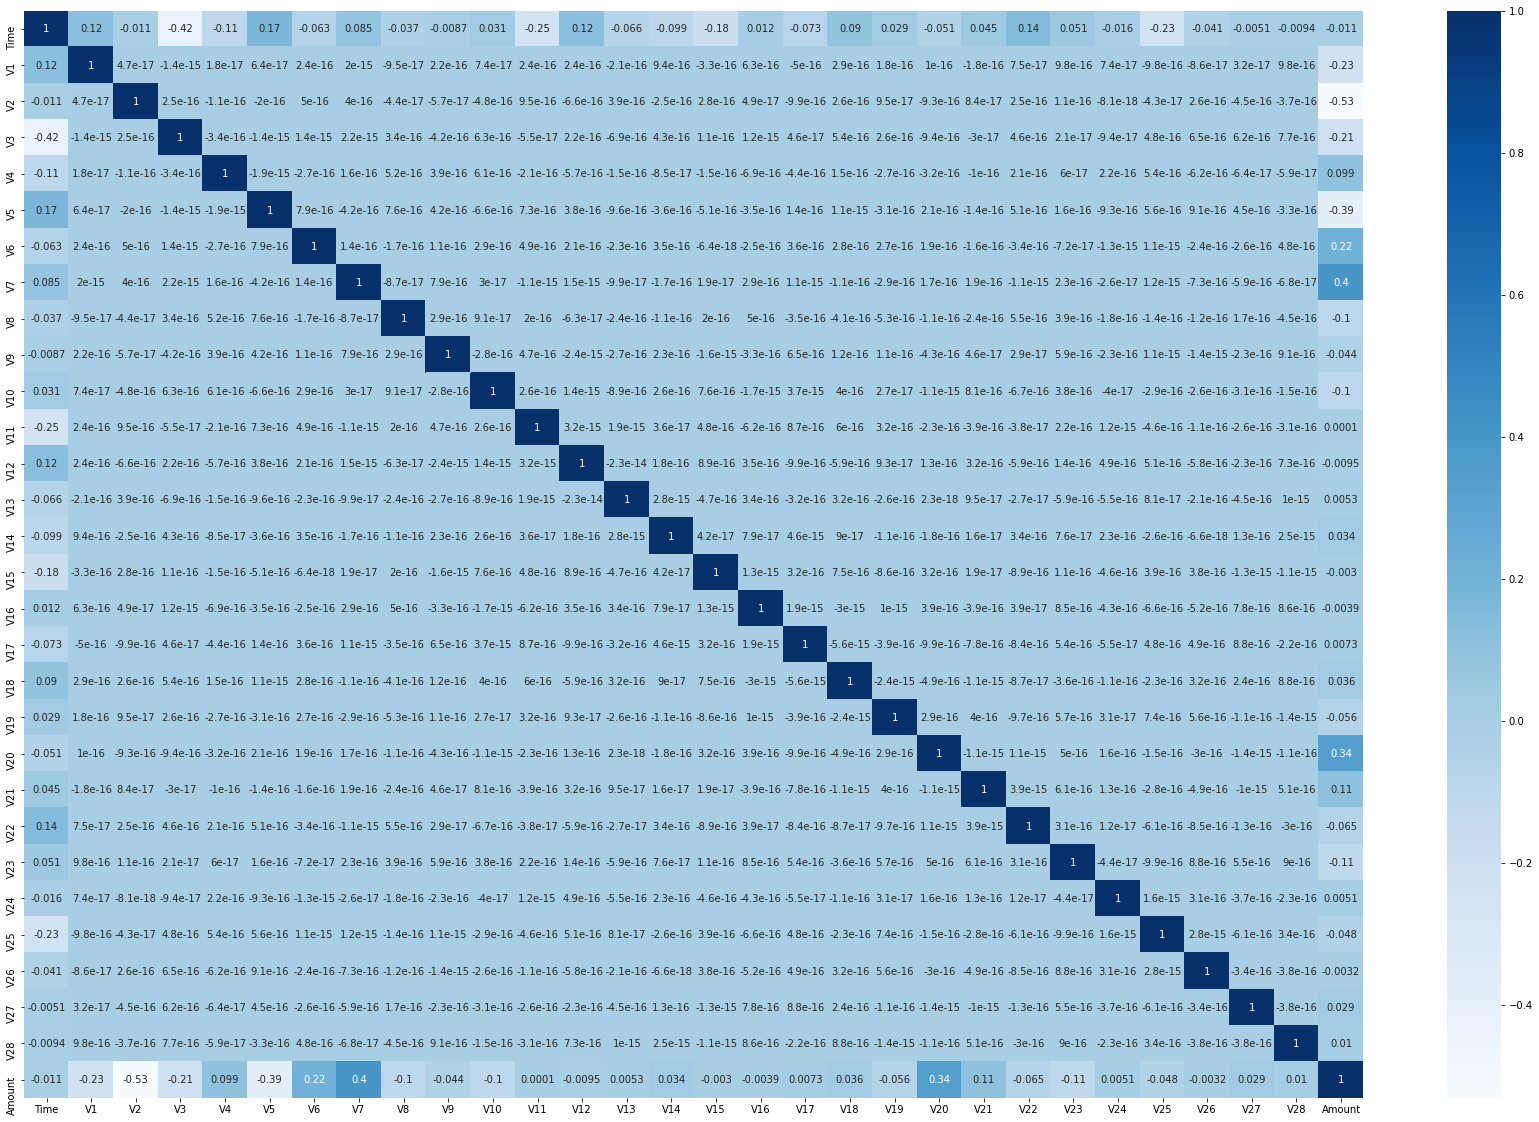

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Data Loading 
drive.mount('/content/drive')

creditcard_path = "/content/drive/My Drive/Data/creditcard.csv"
X_test_path = "/content/drive/My Drive/Data/X_test.csv"
X_train_path = "/content/drive/My Drive/Data/X_train.csv"
y_test_path = "/content/drive/My Drive/Data/y_test.csv"
y_train_path = "/content/drive/My Drive/Data/y_train.csv"
validation_path = "/content/drive/My Drive/Data/validation.csv"

data_set_df = pd.read_csv(creditcard_path)
X_test_df = pd.read_csv(X_test_path)
X_train_df = pd.read_csv(X_train_path)
y_test_df = pd.read_csv(y_test_path)
y_train_df = pd.read_csv(y_train_path)
validation_df = pd.read_csv(validation_path)

plt.subplots(figsize=(30,20)) 
sns.heatmap(data = data_set_df.iloc[:,:-1].corr(), annot=True, cmap='Blues')




            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]


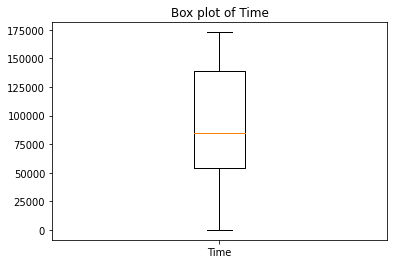

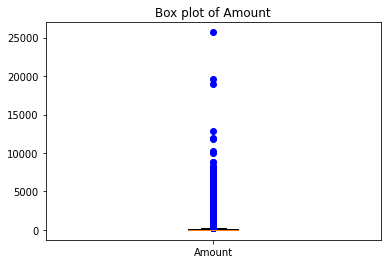

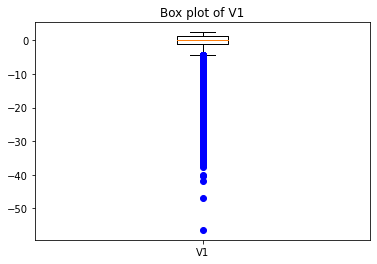

Time      9.481386e+04
V1        3.919560e-15
V2        5.688174e-16
V3       -8.769071e-15
V4        2.782312e-15
V5       -1.552563e-15
V6        2.010663e-15
V7       -1.694249e-15
V8       -1.927028e-16
V9       -3.137024e-15
V10       1.768627e-15
V11       9.170318e-16
V12      -1.810658e-15
V13       1.693438e-15
V14       1.479045e-15
V15       3.482336e-15
V16       1.392007e-15
V17      -7.528491e-16
V18       4.328772e-16
V19       9.049732e-16
V20       5.085503e-16
V21       1.537294e-16
V22       7.959909e-16
V23       5.367590e-16
V24       4.458112e-15
V25       1.453003e-15
V26       1.699104e-15
V27      -3.660161e-16
V28      -1.206049e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64
Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715

In [ ]:
print(data_set_df) 
# V1~V28에 비해서  Time, Amount 두 Feature는 크기가 너무큼 따라서 스케일링을 한번 하려고함 
#StandardScaler MinMaxScaler MaxAbsScaler RobustScaler 
plt.boxplot(data_set_df['Time'], sym="bo")
plt.title('Box plot of Time')
plt.xticks([1], ['Time'])
plt.show()

plt.boxplot(data_set_df['Amount'], sym="bo")
plt.title('Box plot of Amount')
plt.xticks([1], ['Amount'])
plt.show()

plt.boxplot(data_set_df['V1'], sym="bo")
plt.title('Box plot of V1')
plt.xticks([1], ['V1'])
plt.show()

print(data_set_df.mean())
print(data_set_df.min())
print(data_set_df.max())  #Amount mean 80, Amount 0~ 25691.160000 분포가 굉장히 불균등함 
#RobustScaler 선택 

In [ ]:
#스케일링을 위함 
train_Q3 = X_train_df.quantile(0.75).values[1:]
train_Q1 = X_train_df.quantile(0.25).values[1:]
train_median = X_train_df.median().values[1:]

print("트레이닝 데이터의 Q3값 ")
print(train_Q3)
print("트레이닝 데이터의 Q1값 ")
print(train_Q1)
print()

print("분모로 이용될 값")
robust_denominator = train_Q3-train_Q1
print(robust_denominator)
print("분자에서 빼는 각 feature의 median값")
print(train_median)

트레이닝 데이터의 Q3값 
[1.39194500e+05 1.31486486e+00 8.03536846e-01 1.02653168e+00
 7.39399081e-01 6.12019703e-01 4.00599272e-01 5.69764856e-01
 3.27508881e-01 5.99617923e-01 4.53846387e-01 7.40336152e-01
 6.18305294e-01 6.60610491e-01 4.95634189e-01 6.48815736e-01
 5.26426800e-01 4.00428986e-01 5.00811157e-01 4.60733750e-01
 1.32999501e-01 1.86122209e-01 5.28143966e-01 1.47865823e-01
 4.39909222e-01 3.51093679e-01 2.41808573e-01 9.09109826e-02
 7.81168364e-02 7.69800000e+01]
트레이닝 데이터의 Q1값 
[ 5.40900000e+04 -9.19445944e-01 -5.99169027e-01 -8.86767068e-01
 -8.52335110e-01 -6.90304714e-01 -7.68693101e-01 -5.52906049e-01
 -2.07774103e-01 -6.43278049e-01 -5.34814435e-01 -7.59090455e-01
 -4.09139479e-01 -6.50741080e-01 -4.23946158e-01 -5.81443867e-01
 -4.68937386e-01 -4.84422802e-01 -4.99824025e-01 -4.55594312e-01
 -2.11848939e-01 -2.29197616e-01 -5.42848537e-01 -1.61686763e-01
 -3.52524360e-01 -3.19142152e-01 -3.26882212e-01 -7.10474731e-02
 -5.31090374e-02  5.64000000e+00]

분모로 이용될 값
[8.51045000

In [ ]:
def Robust_Scaling(target, medians, denominator):
    return torch.cuda.FloatTensor((target - medians)/denominator);

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import torch.nn.init as init #텐서에 초기값 설정
from sklearn.preprocessing import StandardScaler
import numpy

#https://mkjjo.github.io/python/2019/01/10/scaler.html#:~:text=4.-,RobustScaler,%EC%9D%84%20%ED%99%95%EC%9D%B8%20%ED%95%A0%20%EC%88%98%20%EC%9E%88%EB%8B%A4.

#adam 소스코드 https://github.com/pytorch/pytorch/blob/master/torch/optim/adam.py

# 경사 하강법  loss function에서 주어진 w(parameter)에 대하여, 미분값을 구하고
# 이를 통해 지속적으로 Parameter 값을 업데이트 함으로 써 오차의극솟값을 찾는 방식 
# learning rate : 기울기에 비레하여 변수인 w를 얼마만큼 업데이트할지 결정하는 수치

#파이토치에서는 데이터의 기본단위로 tensor(:n차원의 배열을 전부 포함하는 넓은 개념) 를 사용한다. 
#torch.tnesor(데이터, requires_grad = True) 해당 텐서의 대한 기울기를 저장한다. 

#nn.Linear 는 input feature, output feature, 편차 사용 여부를 parameter로 받는다. 
#해당 클래스에서 변수는 가중치 w와 편향 bias를 가진다. 

'''
데이터 구성 
input feature 30 
train data set : 총 159491
test data set : 총 68354
validation : 총 56962
'''


#데이터 slicing 기존 판다스로 불러온 데이터는 그냥 데이터 분석용으로 계속 활용하고자함 
label = [feature for feature in X_test_df.columns][1:]
X_test = torch.FloatTensor(X_test_df.iloc[:, 1:].values)
X_train = torch.FloatTensor(X_train_df.iloc[:, 1:].values)

y_test = torch.cuda.FloatTensor(y_test_df.iloc[:, -1].values)
y_train = torch.cuda.FloatTensor(y_train_df.iloc[:, -1].values)
validation = torch.cuda.FloatTensor(validation_df.iloc[:, 1:-1].values)

#데이터 스케일링
X_test = Robust_Scaling(X_test.numpy(), train_median, robust_denominator)
X_train = Robust_Scaling(X_train.numpy(), train_median, robust_denominator)

#Input Layer, Output Layer Dimension Definition
input_dimension, output_dimension = 30, 1
train_set_size = 159491
test_set_size = 68354

#Hyper Parameter Definition
neurons_size = 20  # 수치바꿔가며 실험할 것 , 일반적으로 1~2개 정도의 hidden layer면 충분 < 바꿔가며 실험 
'''
https://pytorch.org/docs/stable/optim.html
https://wikidocs.net/60036
https://deepinsight.tistory.com/84#:~:text=Autograd%2D%EC%9E%90%EB%8F%99%EB%AF%B8%EB%B6%84&text=autograd%ED%8C%A8%ED%82%A4%EC%A7%80%EB%8A%94%20Tensor%EC%9D%98,%EC%9D%98%20%EB%A7%A4%20%EB%8B%A8%EA%B3%84%EB%A7%88%EB%8B%A4%20%EB%8B%AC%EB%9D%BC%EC%A7%84%EB%8B%A4.

loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
These are accumulated into x.grad for every parameter x. 
In pseudo-code: x.grad += dloss/dx

optimizer.step updates the value of x using the gradient x.grad. 
For example, the SGD optimizer performs: x += -lr * x.grad

optimizer.zero_grad() and optimizer.step() do not affect the graph of autograd objects. 
They only touch the model’s parameters and the parameter’s grad attributes.
'''
# backward 함수는 autograd 를 사용하여 자동으로 정의  output = model(데이터) 하면 out.backward() 호출 가능함..
# forward() 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행

class NetL1(nn.Module):  
  def __init__(self):
    super().__init__()
    self.input_layer = nn.Linear(input_dimension, neurons_size)
    self.hidden_layer1 = nn.Linear(neurons_size, neurons_size) 
    self.output_layer = nn.Linear(neurons_size, output_dimension)
  def forward(self, input_tensor):
    input_tensor = F.relu(self.input_layer(input_tensor))
    input_tensor = F.relu(self.hidden_layer1(input_tensor))
    input_tensor = torch.sigmoid(self.output_layer(input_tensor))
    return input_tensor.squeeze();

#모델 학습 
model = NetL1().cuda() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # w값 초기화, lr:학습률(eta)
loss_fn = nn.BCELoss()

for i in range(train_set_size):
  inputs, labels = X_train[i], y_train[i]
  y_pred = model(inputs) 
  loss = loss_fn(y_pred, labels)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print("FIN")


Loss :0.8247990012168884
Loss :0.001198592595756054
Loss :9.590847184881568e-05
Loss :0.0
Loss :6.20503633399494e-05
Loss :2.0683026377810165e-05
Loss :1.3530346222978551e-05
Loss :0.0007684798911213875
Loss :0.004200386814773083
Loss :0.0008523519500158727
Loss :0.0
Loss :0.00020273594418540597
Loss :9.859094279818237e-05
Loss :3.159051175316563e-06
Loss :1.3709161976294126e-05
Loss :9.894860704662278e-05
Loss :1.0609683158691041e-05
Loss :0.0002848911681212485
Loss :3.576279254957626e-07
Loss :2.0563813450280577e-05
Loss :2.098105505865533e-05
Loss :1.1384551726223435e-05
Loss :0.00048565733595751226
Loss :0.00027851166669279337
Loss :0.00023326017253566533
Loss :2.360371763643343e-05
Loss :0.0008098185062408447
Loss :0.00011748765973607078
Loss :1.7881409348774469e-06
Loss :1.1682578588079195e-05
Loss :3.4570753086882178e-06
Loss :4.768372718899627e-07
Loss :1.657022767176386e-05
Loss :1.1920930376163597e-07
Loss :1.0132795296158292e-06
Loss :0.0
Loss :0.0
Loss :8.940700695347914e-0

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#모델 테스트 
test_set_size = 68354
predicted_list1 = []

with torch.no_grad():
  predicted_list1 = torch.round(model(X_test))
predicted_list1 = predicted_list1.cpu().numpy()
y_test1 = y_test.cpu().numpy()

print("Over Sampling 안한 일반 결과")
print('Accuracy of the NetL1 {}'.format(accuracy_score(y_test1, predicted_list1)))
print('Precision_score of the NetL1 {}'.format(precision_score(y_test1, predicted_list1)))
print('Recall_score of the NetL1 {}'.format(recall_score(y_test1, predicted_list1)))
print('F1_score of the NetL1 {}'.format(f1_score(y_test1, predicted_list1)))

Over Sampling 안한 일반 결과
Accuracy of the NetL1 0.9994440705737777
Precision_score of the NetL1 0.8461538461538461
Recall_score of the NetL1 0.7623762376237624
F1_score of the NetL1 0.8020833333333334


In [ ]:
#Over Sampling
# 기존 트레이닝 데이터셋 크기 : 159491 -> 오버 샘플링 이후 데이터셋 크기 318396
import random
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_sample(X_train.cpu(), y_train.cpu())


tmp = [[x,y] for x, y in zip(X_train_over, y_train_over)]
random.shuffle(tmp)
X_train_over = torch.cuda.FloatTensor([n[0] for n in tmp])
y_train_over = torch.cuda.FloatTensor([n[1] for n in tmp])


#오버 샘플링 이후 두 트레이닝 데이터셋은 각각 두 개의 클래스의 비율이 1:1로 바뀜 :: 159198 159198 
z_class, nz_class = 0, 0
for item in y_train_over:
  if item == 0 :
    z_class += 1
  elif item == 1:
    nz_class += 1
print(z_class, nz_class)

os_tr_set_size = 318396

#모델 학습 
model2 = NetL1().cuda() 
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3) # w값 초기화, lr:학습률(eta)
loss_fn = nn.BCELoss()

for i in range(os_tr_set_size):
  inputs, labels = X_train_over[i], y_train_over[i]
  y_pred = model2(inputs) 
  loss = loss_fn(y_pred, labels)
  if i % 1000 == 0:
    print('Loss :{}'.format(loss))
  #reset gradients
  #파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있습니다. 예를 들어봅시다.
  #https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
  #https://discuss.pytorch.org/t/what-step-backward-and-zero-grad-do/33301 << tom 답글 읽어보면 좋을듯 . 
  optimizer.zero_grad()
  # backward pass // These are accumulated into x.grad for every parameter x. 
  loss.backward()
  # update weights
  optimizer.step()

print("FIN")
# loss 값이 8로 뛰는 시점 보면 대략 15만번째 이후 데이터임
# 오버샘플링된 데이터만으로 이루어진 구간에서 로스값이 확 튐 > 해결됨 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


159198 159198
Loss :0.5982552766799927
Loss :5.6268367188749835e-05
Loss :0.4652388095855713
Loss :0.0
Loss :1.9073504518019035e-06
Loss :7.40317118470557e-05
Loss :3.850534267257899e-05
Loss :0.0
Loss :0.0058950153179466724
Loss :0.0018401973647996783
Loss :3.878835678100586
Loss :0.10794349759817123
Loss :0.0
Loss :0.0
Loss :0.0
Loss :0.0
Loss :2.801422169795842e-06
Loss :2.6822126528713852e-06
Loss :0.0
Loss :0.07849888503551483
Loss :7.152560215217818e-07
Loss :1.0132795296158292e-06
Loss :0.0
Loss :2.3841860752327193e-07
Loss :0.05501207709312439
Loss :0.0
Loss :0.0
Loss :3.576279254957626e-07
Loss :4.1604907892178744e-05
Loss :0.17238053679466248
Loss :0.0
Loss :0.0009136796579696238
Loss :0.0004490430001169443
Loss :1.788139485370266e-07
Loss :0.0
Loss :0.0
Loss :0.0
Loss :0.11701802164316177
Loss :6.240801303647459e-05
Loss :0.0
Loss :0.4180610477924347
Loss :0.0
Loss :0.0
Loss :0.0
Loss :0.00043240597005933523
Loss :1.8912523984909058
Loss :5.960464477539063e-08
Loss :0.0
Loss

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#모델 테스트 
predicted_list2 = []
with torch.no_grad():
  predicted_list2 = torch.round(model2(X_test))

predicted_list2 = predicted_list2.cpu().numpy()

print("Over Sampling 결과 ")
print('Accuracy of the NetL1 {}'.format(accuracy_score(y_test1, predicted_list2)))
print('Precision_score of the NetL1 {}'.format(precision_score(y_test1, predicted_list2)))
print('Recall_score of the NetL1 {}'.format(recall_score(y_test1, predicted_list2)))
print('F1_score of the NetL1 {}'.format(f1_score(y_test1, predicted_list2)))

#오버샘플링 시 뒤에만 1이 와서 학습시 잘 안되는 문제 
#https://jybaek.tistory.com/781 균등하게 섞기? < 셔플링으로 해결 
#섞고 나면 학습이 잘 안됨...  < 스케일링 문젠 가 싶어서 데이터 스케일링 해봄 
#스케일링 하고 나니까 되긴함. 
#스케일링 이후에 모델 학습  (사이킷런 robust )
#Robust 스케일링 시 테스트셋과 트레이닝셋 각각을 나눠서 했었는데 여기서 좀 문제가 있었던 것 같음
#스케일링함수 따로 짜서 트레이닝셋의 중앙값과 1분위수, 3분위 수를 이용해서 스케일링을 맞춰주니까 정확도가 향상됨

Over Sampling 결과 
Accuracy of the NetL1 0.9977762822951107
Precision_score of the NetL1 0.3824884792626728
Recall_score of the NetL1 0.8217821782178217
F1_score of the NetL1 0.5220125786163522


In [ ]:
class NetL2(nn.Module):  
  def __init__(self):
    super().__init__()
    self.input_layer = nn.Linear(input_dimension, neurons_size)
    self.hidden_layer1 = nn.Linear(neurons_size, neurons_size)
    self.hidden_layer2 = nn.Linear(neurons_size, neurons_size) 
    self.output_layer = nn.Linear(neurons_size, output_dimension)
  def forward(self, input_tensor):
    input_tensor = F.relu(self.input_layer(input_tensor))
    input_tensor = F.relu(self.hidden_layer1(input_tensor))
    input_tensor = F.relu(self.hidden_layer2(input_tensor))
    input_tensor = torch.sigmoid(self.output_layer(input_tensor))
    return input_tensor.squeeze();

#모델 학습 
model9 = NetL2().cuda() 
optimizer = torch.optim.Adam(model9.parameters(), lr=1e-3) # w값 초기화, lr:학습률(eta)
loss_fn = nn.BCELoss()

for i in range(train_set_size):
  inputs, labels = X_train[i], y_train[i]
  y_pred = model9(inputs) 
  loss = loss_fn(y_pred, labels)
  if i % 1000 == 0:
    print('Loss :{}'.format(loss)) 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print("FIN")

Loss :0.7548936605453491
Loss :0.0002911514602601528
Loss :6.377717454597587e-06
Loss :0.0
Loss :5.161895387573168e-05
Loss :4.1723259869286267e-07
Loss :0.0004787398793268949
Loss :0.0009147535311058164
Loss :0.009324616752564907
Loss :0.0014171504881232977
Loss :0.0
Loss :8.100599370663986e-05
Loss :0.00018979920423589647
Loss :3.9757087506586686e-05
Loss :2.145769485650817e-06
Loss :3.60614612873178e-05
Loss :4.178372910246253e-05
Loss :0.0007890595006756485
Loss :3.337865791763761e-06
Loss :8.392686140723526e-05
Loss :7.659490074729547e-05
Loss :3.993519385403488e-06
Loss :0.0010809778468683362
Loss :0.00023254475672729313
Loss :8.464217535220087e-05
Loss :7.092977739375783e-06
Loss :4.5181343011790887e-05
Loss :0.0009349185274913907
Loss :3.3974704365391517e-06
Loss :1.0430867405375466e-05
Loss :5.543247425521258e-06
Loss :7.176656799856573e-05
Loss :0.0002899590181186795
Loss :2.1159872630960308e-05
Loss :5.543247425521258e-06
Loss :0.0
Loss :1.788139485370266e-07
Loss :2.4437933

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#모델 테스트 
predicted_list3 = []
with torch.no_grad():
  predicted_list3 = torch.round(model9(X_test))

predicted_list3 = predicted_list3.cpu().numpy()

print("레이어 2개짜리 결과 ")
print('Accuracy of the NetL2 {}'.format(accuracy_score(y_test1, predicted_list3)))
print('Precision_score of the NetL2 {}'.format(precision_score(y_test1, predicted_list3)))
print('Recall_score of the NetL2 {}'.format(recall_score(y_test1, predicted_list3)))
print('F1_score of the NetL2 {}'.format(f1_score(y_test1, predicted_list3)))


레이어 2개짜리 결과 
Accuracy of the NetL2 0.9993709219650643
Precision_score of the NetL2 0.8625
Recall_score of the NetL2 0.6831683168316832
F1_score of the NetL2 0.7624309392265194


In [ ]:
class NetL3(nn.Module):  
  def __init__(self):
    super().__init__()
    self.input_layer = nn.Linear(input_dimension, neurons_size)
    self.hidden_layer1 = nn.Linear(neurons_size, neurons_size)
    self.hidden_layer2 = nn.Linear(neurons_size, neurons_size) 
    self.hidden_layer3 = nn.Linear(neurons_size, neurons_size) 
    self.output_layer = nn.Linear(neurons_size, output_dimension)
  def forward(self, input_tensor):
    input_tensor = F.relu(self.input_layer(input_tensor))
    input_tensor = F.relu(self.hidden_layer1(input_tensor))
    input_tensor = F.relu(self.hidden_layer2(input_tensor))
    input_tensor = F.relu(self.hidden_layer3(input_tensor))
    input_tensor = torch.sigmoid(self.output_layer(input_tensor))
    return input_tensor.squeeze();

#모델 학습 
model10 = NetL3().cuda() 
optimizer = torch.optim.Adam(model10.parameters(), lr=1e-3) # w값 초기화, lr:학습률(eta)
loss_fn = nn.BCELoss()

for i in range(train_set_size):
  inputs, labels = X_train[i], y_train[i]
  y_pred = model10(inputs) 
  loss = loss_fn(y_pred, labels)
  if i % 1000 == 0:
    print('Loss :{}'.format(loss))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print("FIN")

Loss :0.6010197401046753
Loss :2.3663324100198224e-05
Loss :4.1723259869286267e-07
Loss :0.0
Loss :2.2590415028389543e-05
Loss :2.6822126528713852e-06
Loss :1.1920930376163597e-07
Loss :0.000724995625205338
Loss :0.0035600776318460703
Loss :0.00019677428645081818
Loss :0.0
Loss :1.5497327694902197e-05
Loss :0.00018508954963181168
Loss :1.4186006410454866e-05
Loss :2.3841860752327193e-07
Loss :5.787778354715556e-05
Loss :1.3113030945532955e-06
Loss :0.002209181198850274
Loss :2.694166323635727e-05
Loss :0.0013725636526942253
Loss :6.020087312208489e-06
Loss :5.364419735087722e-07
Loss :0.0002916284429375082
Loss :6.556513199029723e-07
Loss :1.4722455489390995e-05
Loss :1.2516983360910672e-06
Loss :4.887592695013154e-06
Loss :0.0006545539363287389
Loss :2.3841860752327193e-07
Loss :4.529963462118758e-06
Loss :1.8477456933396752e-06
Loss :1.1920930376163597e-07
Loss :1.7285361764152185e-06
Loss :0.0
Loss :0.0
Loss :0.0
Loss :0.0
Loss :0.0
Loss :0.0
Loss :0.0
Loss :0.0
Loss :1.847745693339

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#모델 테스트 
predicted_list4 = []
with torch.no_grad():
  predicted_list4 = torch.round(model10(X_test))

predicted_list4 = predicted_list4.cpu().numpy()

print("레이어 3개짜리 결과 ")
print('Accuracy of the NetL2 {}'.format(accuracy_score(y_test1, predicted_list4)))
print('Precision_score of the NetL2 {}'.format(precision_score(y_test1, predicted_list4)))
print('Recall_score of the NetL2 {}'.format(recall_score(y_test1, predicted_list4)))
print('F1_score of the NetL2 {}'.format(f1_score(y_test1, predicted_list4)))


레이어 3개짜리 결과 
Accuracy of the NetL2 0.999429440852035
Precision_score of the NetL2 0.8444444444444444
Recall_score of the NetL2 0.7524752475247525
F1_score of the NetL2 0.7958115183246073


In [ ]:
class NetL1U(nn.Module):  
  def __init__(self):
    super().__init__()
    self.input_layer = nn.Linear(input_dimension, 40)
    self.hidden_layer1 = nn.Linear(40, 40) # 유닛수 두배로 증가 시킴 
    self.output_layer = nn.Linear(40, output_dimension)
  def forward(self, input_tensor):
    input_tensor = F.relu(self.input_layer(input_tensor))
    input_tensor = F.relu(self.hidden_layer1(input_tensor))
    input_tensor = torch.sigmoid(self.output_layer(input_tensor))
    return input_tensor.squeeze();

#모델 학습 
model12 = NetL1U().cuda() 
optimizer = torch.optim.Adam(model12.parameters(), lr=1e-3) # w값 초기화, lr:학습률(eta)
loss_fn = nn.BCELoss()

for i in range(train_set_size):
  inputs, labels = X_train[i], y_train[i]
  y_pred = model12(inputs) 
  loss = loss_fn(y_pred, labels)
  if i % 1000 == 0:
    print('Loss :{}'.format(loss))
  optimizer.zero_grad() 
  loss.backward()
  optimizer.step()

print("FIN")

Loss :0.6938692331314087
Loss :0.0003103499475400895
Loss :0.00010157147335121408
Loss :3.159051175316563e-06
Loss :0.00015319566591642797
Loss :3.695494797284482e-06
Loss :3.546539301169105e-05
Loss :0.00023302171030081809
Loss :0.0033483472652733326
Loss :0.0005991465295664966
Loss :0.0
Loss :9.000706631923094e-05
Loss :0.00023886433336883783
Loss :2.1696325347875245e-05
Loss :1.3947584193374496e-05
Loss :3.254466719226912e-05
Loss :4.947197794535896e-06
Loss :0.0002628910297062248
Loss :2.861027041944908e-06
Loss :6.741512333974242e-05
Loss :4.917503974866122e-05
Loss :5.960464477539063e-08
Loss :8.404290383623447e-06
Loss :6.55653229841846e-06
Loss :2.372293056396302e-05
Loss :3.576279254957626e-07
Loss :1.3709077393286861e-06
Loss :9.143770876107737e-05
Loss :3.218656047465629e-06
Loss :2.6822126528713852e-06
Loss :5.364419735087722e-07
Loss :5.364419735087722e-07
Loss :4.11272912970162e-06
Loss :1.788139485370266e-07
Loss :2.98023280720372e-07
Loss :0.0
Loss :0.0
Loss :5.96046447

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#모델 테스트 
predicted_list5 = []
with torch.no_grad():
  predicted_list5 = torch.round(model12(X_test))

predicted_list5 = predicted_list5.cpu().numpy()

print("레이어 1개짜리 유닛수 2배 ")
print('Accuracy of the NetL2 {}'.format(accuracy_score(y_test1, predicted_list5)))
print('Precision_score of the NetL2 {}'.format(precision_score(y_test1, predicted_list5)))
print('Recall_score of the NetL2 {}'.format(recall_score(y_test1, predicted_list5)))
print('F1_score of the NetL2 {}'.format(f1_score(y_test1, predicted_list5)))


레이어 1개짜리 유닛수 2배 
Accuracy of the NetL2 0.9994001814085496
Precision_score of the NetL2 0.8488372093023255
Recall_score of the NetL2 0.7227722772277227
F1_score of the NetL2 0.7807486631016043


In [ ]:
class NetL1U10(nn.Module):  
  def __init__(self):
    super().__init__()
    self.input_layer = nn.Linear(input_dimension, 10)
    self.hidden_layer1 = nn.Linear(10, 10) # 유닛수 두배로 감소 시킴 
    self.output_layer = nn.Linear(10, output_dimension)
  def forward(self, input_tensor):
    input_tensor = F.relu(self.input_layer(input_tensor))
    input_tensor = F.relu(self.hidden_layer1(input_tensor))
    input_tensor = torch.sigmoid(self.output_layer(input_tensor))
    return input_tensor.squeeze();

#모델 학습 
model13 = NetL1U10().cuda() 
optimizer = torch.optim.Adam(model13.parameters(), lr=1e-3) # w값 초기화, lr:학습률(eta)
loss_fn = nn.BCELoss()

for i in range(train_set_size):
  inputs, labels = X_train[i], y_train[i]
  y_pred = model13(inputs) 
  loss = loss_fn(y_pred, labels)
  if i % 1000 == 0:
    print('Loss :{}'.format(loss))
  optimizer.zero_grad() 
  loss.backward()
  optimizer.step()

print("FIN")

Loss :0.9334125518798828
Loss :0.0010745335603132844
Loss :0.0015528928488492966
Loss :1.8000764612224884e-05
Loss :0.00031410620431415737
Loss :0.0010171935427933931
Loss :0.0001600512769073248
Loss :0.000962422345764935
Loss :0.004687550012022257
Loss :0.002911749528720975
Loss :0.0
Loss :6.902455788804218e-05
Loss :8.571515354560688e-05
Loss :7.36740548745729e-05
Loss :1.3649556422024034e-05
Loss :5.149974094820209e-05
Loss :5.185617737879511e-06
Loss :0.00011027467553503811
Loss :3.218656047465629e-06
Loss :2.6584024453768507e-05
Loss :1.6451016563223675e-05
Loss :5.364419735087722e-07
Loss :1.7047073924914002e-05
Loss :2.1517507775570266e-05
Loss :5.513581709237769e-05
Loss :2.8729851692332886e-05
Loss :5.3287971240933985e-05
Loss :0.00019522426009643823
Loss :3.159051175316563e-06
Loss :3.0577652069041505e-05
Loss :8.404290383623447e-06
Loss :6.437322554120328e-06
Loss :1.4007189747644588e-05
Loss :2.0861648408754263e-06
Loss :8.940700695347914e-07
Loss :0.0
Loss :5.3644197350877

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#모델 테스트 
predicted_list7 = []
with torch.no_grad():
  predicted_list7 = torch.round(model13(X_test))

predicted_list7 = predicted_list7.cpu().numpy()

print("레이어 1개짜리 유닛수 2배 감소")
print('Accuracy of the NetL2 {}'.format(accuracy_score(y_test1, predicted_list7)))
print('Precision_score of the NetL2 {}'.format(precision_score(y_test1, predicted_list7)))
print('Recall_score of the NetL2 {}'.format(recall_score(y_test1, predicted_list7)))
print('F1_score of the NetL2 {}'.format(f1_score(y_test1, predicted_list7)))


레이어 1개짜리 유닛수 2배 감소
Accuracy of the NetL2 0.9994148111302923
Precision_score of the NetL2 0.8588235294117647
Recall_score of the NetL2 0.7227722772277227
F1_score of the NetL2 0.7849462365591399


In [ ]:
class NetL1U100(nn.Module):  
  def __init__(self):
    super().__init__()
    self.input_layer = nn.Linear(input_dimension, 100)
    self.hidden_layer1 = nn.Linear(100, 100) 
    self.output_layer = nn.Linear(100, output_dimension)
  def forward(self, input_tensor):
    input_tensor = F.relu(self.input_layer(input_tensor))
    input_tensor = F.relu(self.hidden_layer1(input_tensor))
    input_tensor = torch.sigmoid(self.output_layer(input_tensor))
    return input_tensor.squeeze();

#모델 학습 
model14 = NetL1U100().cuda() 
optimizer = torch.optim.Adam(model14.parameters(), lr=1e-3) 
loss_fn = nn.BCELoss()

for i in range(train_set_size):
  inputs, labels = X_train[i], y_train[i]
  y_pred = model14(inputs) 
  loss = loss_fn(y_pred, labels)
  if i % 1000 == 0:
    print('Loss :{}'.format(loss))
  optimizer.zero_grad() 
  loss.backward()
  optimizer.step()

print("FIN")

Loss :0.6627850532531738
Loss :0.0007336445851251483
Loss :3.993519385403488e-06
Loss :3.576279254957626e-07
Loss :5.5910721130203456e-05
Loss :2.205374357799883e-06
Loss :2.968355329358019e-05
Loss :0.00028727605240419507
Loss :0.0027656019665300846
Loss :0.000709845160599798
Loss :0.0
Loss :4.1604907892178744e-05
Loss :4.434683796716854e-05
Loss :3.3974704365391517e-06
Loss :4.410753263073275e-06
Loss :1.7345102605759166e-05
Loss :7.748606662971724e-07
Loss :0.0006542557384818792
Loss :5.960464477539063e-08
Loss :2.1457903130794875e-05
Loss :6.258507255552104e-06
Loss :2.98023280720372e-07
Loss :4.7982888645492494e-05
Loss :5.024797792430036e-05
Loss :3.802848732448183e-05
Loss :1.8477456933396752e-06
Loss :1.1920935776288388e-06
Loss :8.571515354560688e-05
Loss :2.3245838747243397e-06
Loss :4.11272912970162e-06
Loss :1.5497220147153712e-06
Loss :4.470358362596016e-06
Loss :2.8431819373508915e-05
Loss :2.98023280720372e-07
Loss :3.337865791763761e-06
Loss :0.0
Loss :0.0
Loss :2.98023

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#모델 테스트 
predicted_list8 = []
with torch.no_grad():
  predicted_list8 = torch.round(model14(X_test))

predicted_list8 = predicted_list8.cpu().numpy()

print("레이어 1개짜리 유닛수 100개")
print('Accuracy of the NetL2 {}'.format(accuracy_score(y_test1, predicted_list8)))
print('Precision_score of the NetL2 {}'.format(precision_score(y_test1, predicted_list8)))
print('Recall_score of the NetL2 {}'.format(recall_score(y_test1, predicted_list8)))
print('F1_score of the NetL2 {}'.format(f1_score(y_test1, predicted_list8)))


레이어 1개짜리 유닛수 100개
Accuracy of the NetL2 0.9993124030780934
Precision_score of the NetL2 0.8461538461538461
Recall_score of the NetL2 0.6534653465346535
F1_score of the NetL2 0.7374301675977654


In [ ]:
class NetL1U5(nn.Module):  
  def __init__(self):
    super().__init__()
    self.input_layer = nn.Linear(input_dimension, 5)
    self.hidden_layer1 = nn.Linear(5, 5) 
    self.output_layer = nn.Linear(5, output_dimension)
  def forward(self, input_tensor):
    input_tensor = F.relu(self.input_layer(input_tensor))
    input_tensor = F.relu(self.hidden_layer1(input_tensor))
    input_tensor = torch.sigmoid(self.output_layer(input_tensor))
    return input_tensor.squeeze();

#모델 학습 
model15 = NetL1U5().cuda() 
optimizer = torch.optim.Adam(model15.parameters(), lr=1e-3) 
loss_fn = nn.BCELoss()

for i in range(train_set_size):
  inputs, labels = X_train[i], y_train[i]
  y_pred = model15(inputs) 
  loss = loss_fn(y_pred, labels)
  if i % 1000 == 0:
    print('Loss :{}'.format(loss))
  optimizer.zero_grad() 
  loss.backward()
  optimizer.step()

print("FIN")

Loss :0.7361718416213989
Loss :0.0018627697136253119
Loss :0.0002961001009680331
Loss :5.960466182841628e-07
Loss :0.0010079455096274614
Loss :0.0016186813591048121
Loss :5.8235433243680745e-05
Loss :0.0007876278250478208
Loss :0.008338309824466705
Loss :0.0035226927138864994
Loss :0.0
Loss :0.00021090346854180098
Loss :0.00011230145901208743
Loss :0.00021913068485446274
Loss :1.2457448065106291e-05
Loss :7.659490074729547e-05
Loss :1.722589149721898e-05
Loss :8.249623351730406e-05
Loss :4.0531240301788785e-06
Loss :0.00024220299383159727
Loss :4.696956239058636e-05
Loss :3.415404353290796e-05
Loss :0.00023934128694236279
Loss :0.0004884601221419871
Loss :0.00015766671276651323
Loss :3.749202369363047e-05
Loss :0.0006451899535022676
Loss :0.00033235110458917916
Loss :5.3287971240933985e-05
Loss :4.166451617493294e-05
Loss :3.361758354003541e-05
Loss :1.9669725588755682e-05
Loss :3.027961793122813e-05
Loss :1.5139694369281642e-05
Loss :2.0861648408754263e-06
Loss :0.0
Loss :0.0
Loss :3.

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#모델 테스트 
predicted_list9 = []
with torch.no_grad():
  predicted_list9 = torch.round(model15(X_test))

predicted_list9 = predicted_list9.cpu().numpy()

print("레이어 1개짜리 유닛수 5개")
print('Accuracy of the NetL2 {}'.format(accuracy_score(y_test1, predicted_list9)))
print('Precision_score of the NetL2 {}'.format(precision_score(y_test1, predicted_list9)))
print('Recall_score of the NetL2 {}'.format(recall_score(y_test1, predicted_list9)))
print('F1_score of the NetL2 {}'.format(f1_score(y_test1, predicted_list9)))


레이어 1개짜리 유닛수 5개
Accuracy of the NetL2 0.9994440705737777
Precision_score of the NetL2 0.8461538461538461
Recall_score of the NetL2 0.7623762376237624
F1_score of the NetL2 0.8020833333333334
